## Задачи по регрессии, классификации и кластеризации

В рамках задачи регрессии нужно предсказать цену телефона, для классификации - операционную систему или год выпуска устройства. Для задачи кластеризации необходимо запустить алгоритм кластеризации, в котором количество кластеров и признаки можете выбрать на свое усмотрение.

## 1. Регрессия. Предсказание цены телефона

In [248]:
import numpy as np
import pandas as pd

In [249]:
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D # для отрисовки 3D проекции

matplotlib.rc("font", size=13) # для увеличения шрифта подписей графиков

In [250]:
phones = pd.read_csv("1.8_phones.csv")
phones.head()

,disk,os,price,year
0,64,Android,7256,2016
1,128,Android,7623,2015
2,64,Android,1916,2010
3,512,iOS,15045,2017
4,16,Android,4478,2013


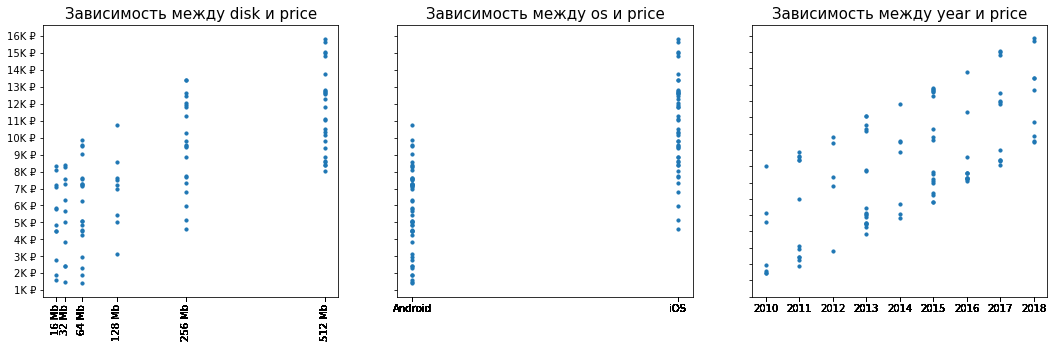

In [251]:
figure, three_axes = plt.subplots(1, 3, figsize = (18, 5), sharey = True)
for column, ax in zip(phones.columns.difference(['price']), three_axes.flatten()):
    ax.set_title("Зависимость между {} и price".format(column), fontsize = 15)
    ax.scatter(phones[column], phones['price'], s = 10)
    
    
    
    ax.set_xticks(phones[column])
    if column == 'disk':
        ax.set_xticklabels((str(i) + ' Mb' for i in phones[column]), rotation = 90, fontsize = 10)
    else:
        ax.set_xticklabels(phones[column], fontsize = 10)
    ax.set_yticks(range(0, 17000, 1000))
    ax.set_yticklabels(((str(j)[:-3] + 'K ₽') for j in range(0, 17000, 1000)), fontsize = 10)

In [252]:
from sklearn.linear_model import LinearRegression

In [253]:
X = phones[["year"]]
y = phones["price"]

LinearRegression().fit(X, y).predict(X[0:1])[0]

9838.83475733595

In [254]:
def reg_prediction(a, b, dim_1):
    return a + b * dim_1

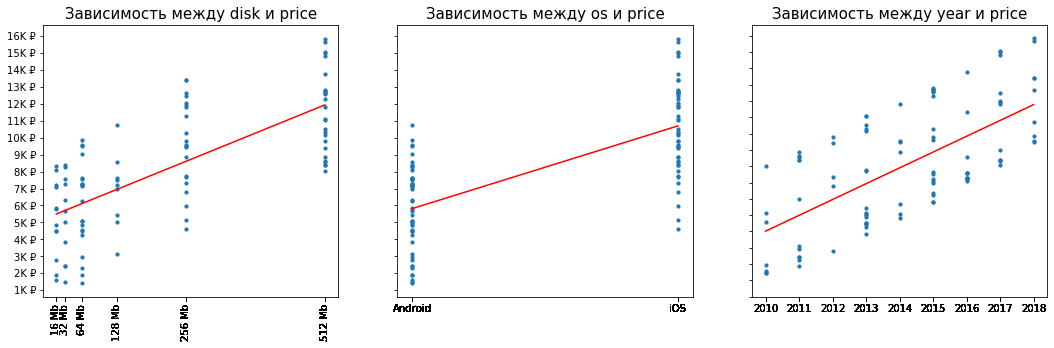

In [255]:
figure, three_axes = plt.subplots(1, 3, figsize = (18, 5), sharey = True)
for column, ax in zip(phones.columns.difference(['price']), three_axes.flatten()):
    ax.set_title("Зависимость между {} и price".format(column), fontsize = 15)
    ax.scatter(phones[column], phones['price'], s = 10)
    
    if column == 'os':
        X = phones[[column]].isin(['iOS']).astype('int')
    else:
        X = phones[[column]]
    y = phones['price']
    reg = LinearRegression().fit(X, y)
    
    [b] = reg.coef_
    a = reg.intercept_
    
    ax.plot([X[column].min(), X[column].max()], [reg_prediction(a, b, X[column].min()), reg_prediction(a, b, X[column].max())], c="red")
    
    ax.set_xticks(phones[column])
    if column == 'disk':
        ax.set_xticklabels((str(i) + ' Mb' for i in phones[column]), rotation = 90, fontsize = 10)
    else:
        ax.set_xticklabels(phones[column], fontsize = 10)
    ax.set_yticks(range(0, 17000, 1000))
    ax.set_yticklabels(((str(j)[:-3] + 'K ₽') for j in range(0, 17000, 1000)), fontsize = 10)

In [256]:
X = phones[["disk", "year"]]
y = phones["price"]

LinearRegression().fit(X, y).predict(X[0:1])[0]

7848.046694419114

In [257]:
cols = list(phones.columns.difference(['price']))

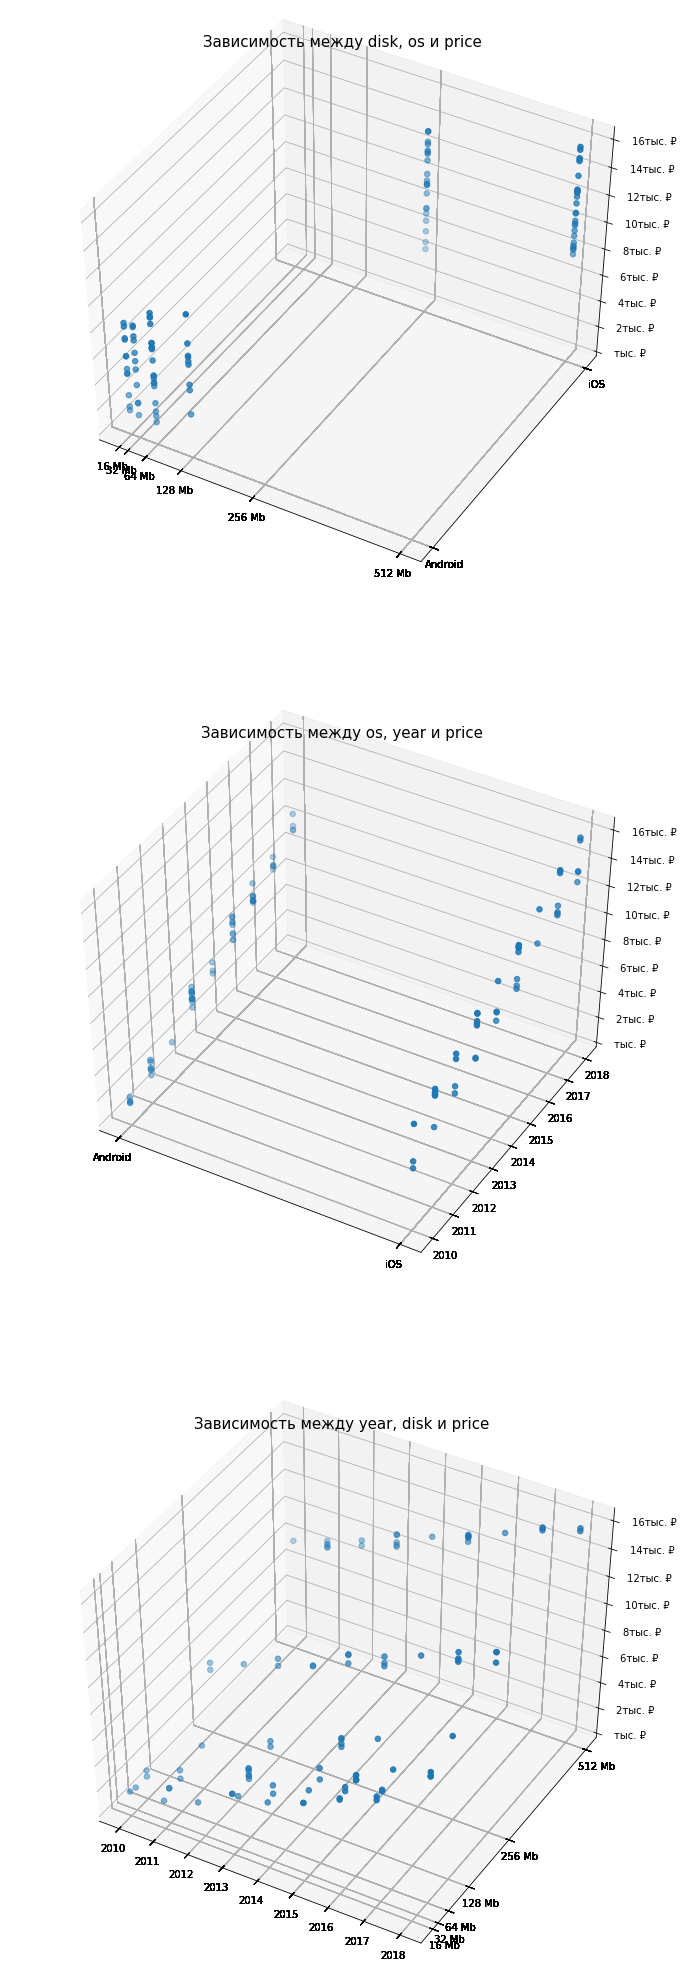

In [258]:
figure = plt.figure(figsize=(12, 36))
i = 1
for column in cols:
    nextcolumn = cols[(cols.index(column) + 1) % len(cols)]
    ax = figure.add_subplot(3, 1, i, projection ='3d')
    ax.set_title("Зависимость между {}, {} и price".format(column, nextcolumn), fontsize = 15)
    
    if column == 'os':
        column_bool = phones[column].isin(['iOS']).astype('int')
        ax.scatter(column_bool, phones[nextcolumn], phones['price'], s = 30)
        ax.set_xticks(column_bool)
        ax.set_xticklabels(phones[column], fontsize = 10)
        ax.set_yticks(phones[nextcolumn])
        ax.set_yticklabels(phones[nextcolumn], fontsize = 10)
    elif nextcolumn == 'os':
        nextcolumn_bool = phones[nextcolumn].isin(['iOS']).astype('int')
        ax.scatter(phones[column], nextcolumn_bool, phones['price'], s = 30)
        ax.set_xticks(phones[column])
        ax.set_xticklabels((str(i) + ' Mb' for i in phones[column]), fontsize = 10)
        ax.set_yticks(nextcolumn_bool)
        ax.set_yticklabels(phones[nextcolumn], fontsize = 10) 
    else:
        ax.scatter(phones[column], phones[nextcolumn], phones['price'], s = 30)
        ax.set_xticks(phones[column])
        ax.set_xticklabels(phones[column], fontsize = 10)
        ax.set_yticks(phones[nextcolumn])
        ax.set_yticklabels((str(i) + ' Mb' for i in phones[nextcolumn]), fontsize = 10)
    
    ax.set_zticks(range(0, 17000, 2000))
    ax.set_zticklabels(((str(j)[:-3] + 'тыс. ₽') for j in range(0, 17000, 2000)), fontsize = 10, ha = 'left')
       
    ax.elev = 45
    
    i += 1
plt.show()

На основе исследуемых данных можно сделать три очевидных вывода:
* Представлены телефоны на Android только до 128МБ, телефоны на iOS только от 256МБ
* Телефоны на iOS в среднем дороже, чем на Android, возможно по причине первого пункта
* С каждым годом цены на телефоны растут вне зависимости от рассматриваемых факторов


In [259]:
phones['os'] = phones['os'].isin(['iOS']).astype('int')

In [260]:
def get_params(reg, col_1, col_2):
    d1, d2 = list(), list()
    
    for i in np.linspace(min(col_1), max(col_1), 100):
        for j in np.linspace(min(col_2), max(col_2), 100):
            d1.append(i)
            d2.append(j)
    d1 = np.array(d1).reshape(-1, 1)
    d2 = np.array(d2).reshape(-1, 1)
    p = reg.predict(np.concatenate([d1, d2], axis=1))
    
    return d1, d2, p

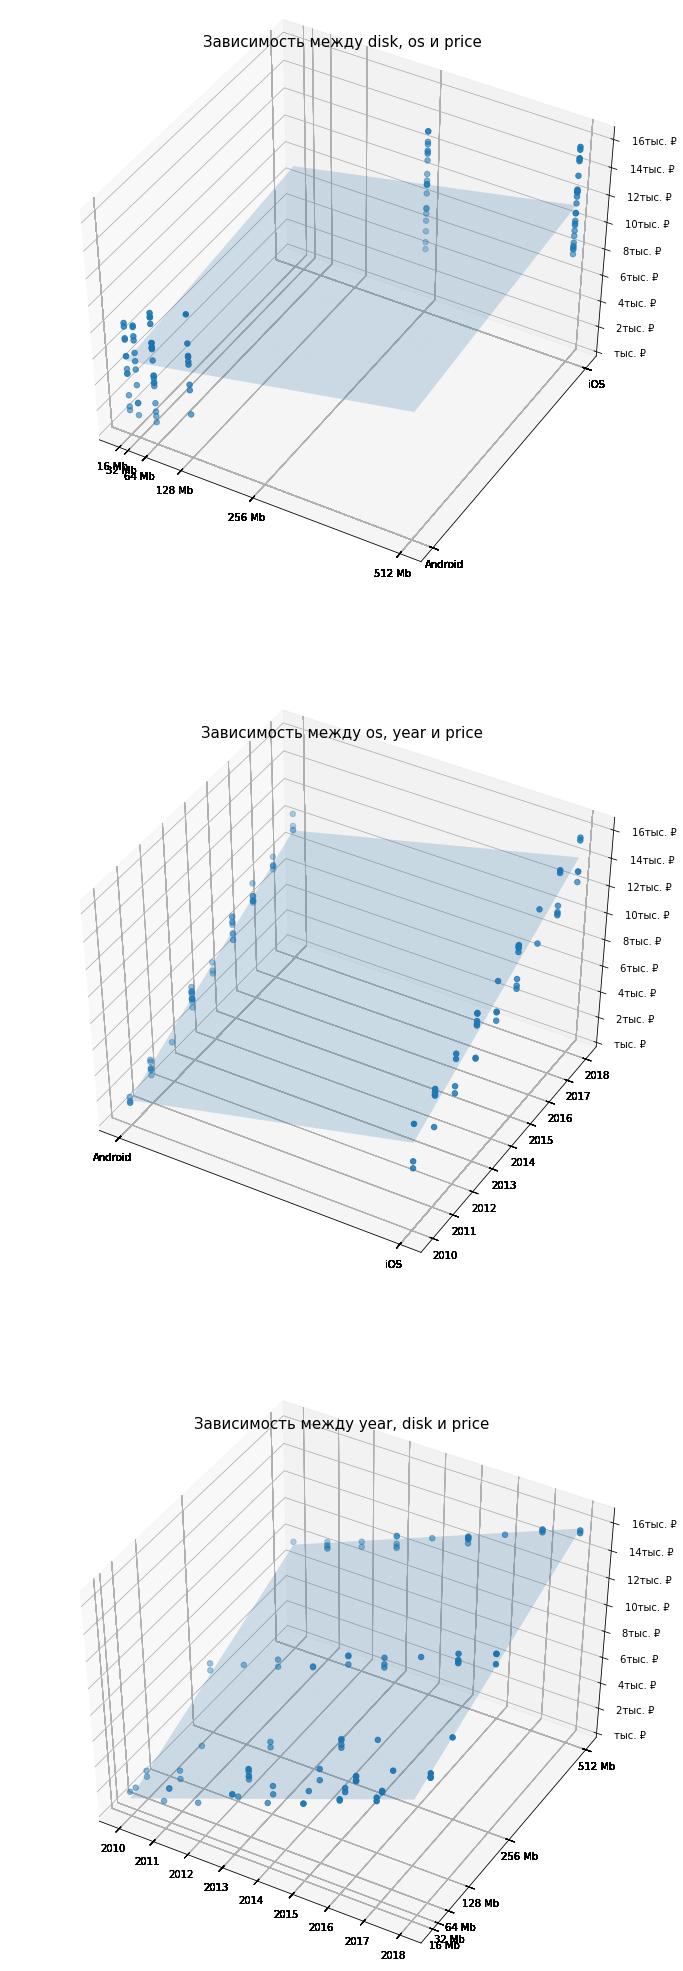

In [261]:
figure = plt.figure(figsize=(12, 36))
i = 1
cond = [phones['os'] == 0, phones['os'] == 1]
out = ['Android', 'iOS']
for column in cols:
    nextcolumn = cols[(cols.index(column) + 1) % len(cols)]
    aimcolumn = phones['price']
    
    ax = figure.add_subplot(3, 1, i, projection ='3d')
    ax.set_title("Зависимость между {}, {} и price".format(column, nextcolumn), fontsize = 15)
    ax.scatter(phones[column], phones[nextcolumn], aimcolumn, s = 30)
        
    X = phones[[column, nextcolumn]]
    reg = LinearRegression().fit(X, aimcolumn)
        
    d1, d2, p = get_params(reg, phones[column], phones[nextcolumn])
    ax.plot_trisurf(d1.ravel(), d2.ravel(), p, alpha=0.2)
    
    if column == 'os':
        ax.set_xticks(phones[column])
        ax.set_xticklabels(np.select(cond, out), fontsize = 10)
        ax.set_yticks(phones[nextcolumn])
        ax.set_yticklabels(phones[nextcolumn], fontsize = 10)
    elif nextcolumn == 'os':
        ax.set_xticks(phones[column])
        ax.set_xticklabels((str(i) + ' Mb' for i in phones[column]), fontsize = 10)
        ax.set_yticks(phones[nextcolumn])
        ax.set_yticklabels(np.select(cond, out), fontsize = 10) 
    else:
        ax.set_xticks(phones[column])
        ax.set_xticklabels(phones[column], fontsize = 10)
        ax.set_yticks(phones[nextcolumn])
        ax.set_yticklabels((str(i) + ' Mb' for i in phones[nextcolumn]), fontsize = 10)
    
    ax.set_zticks(range(0, 17000, 2000))
    ax.set_zticklabels(((str(j)[:-3] + 'тыс. ₽') for j in range(0, 17000, 2000)), fontsize = 10, ha = 'left')
    
    ax.elev = 45
    
    i += 1
plt.show()

## 2. Классификация. Определение операционной системы и года выпуска устройства

In [262]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_text

In [263]:
phones = pd.read_csv("1.8_phones.csv")
phones.head()

,disk,os,price,year
0,64,Android,7256,2016
1,128,Android,7623,2015
2,64,Android,1916,2010
3,512,iOS,15045,2017
4,16,Android,4478,2013


In [264]:
X = phones[["price", "year"]]
y = phones["os"]

cl = DecisionTreeClassifier().fit(X, y)

In [265]:
print(export_text(cl))

|--- feature_0 <= 7660.50
|   |--- feature_1 <= 2012.50
|   |   |--- feature_0 <= 3855.50
|   |   |   |--- class: Android
|   |   |--- feature_0 >  3855.50
|   |   |   |--- class: iOS
|   |--- feature_1 >  2012.50
|   |   |--- class: Android
|--- feature_0 >  7660.50
|   |--- feature_1 <= 2015.50
|   |   |--- class: iOS
|   |--- feature_1 >  2015.50
|   |   |--- feature_0 <= 11017.00
|   |   |   |--- class: Android
|   |   |--- feature_0 >  11017.00
|   |   |   |--- class: iOS



In [266]:
cols2 = list(phones.columns.difference(['os']))

In [267]:
def check_prediction(line, ycolumn):

    cols = list(phones.columns.difference([ycolumn]))

    for column in cols:
        nextcolumn = cols[(cols.index(column) + 1) % len(cols)]
        X = phones[[column, nextcolumn]]
        y = phones[ycolumn]
        print("Признаки: ", column, nextcolumn)
        print("Прогноз/Реальность: {}/{}".format(DecisionTreeClassifier().fit(X, y).predict(X[line:line+1])[0], y[line])) 

In [268]:
check_prediction(5, 'os')

Признаки:  disk price
Прогноз/Реальность: iOS/iOS
Признаки:  price year
Прогноз/Реальность: iOS/iOS
Признаки:  year disk
Прогноз/Реальность: iOS/iOS


In [269]:
phones['os'] = phones['os'].isin(['iOS']).astype('int')

In [270]:
check_prediction(2, 'year')

Признаки:  disk os
Прогноз/Реальность: 2013/2010
Признаки:  os price
Прогноз/Реальность: 2010/2010
Признаки:  price disk
Прогноз/Реальность: 2010/2010


In [271]:
check_prediction(3, 'year')

Признаки:  disk os
Прогноз/Реальность: 2015/2017
Признаки:  os price
Прогноз/Реальность: 2017/2017
Признаки:  price disk
Прогноз/Реальность: 2017/2017


In [272]:
check_prediction(5, 'year')

Признаки:  disk os
Прогноз/Реальность: 2015/2018
Признаки:  os price
Прогноз/Реальность: 2018/2018
Признаки:  price disk
Прогноз/Реальность: 2018/2018


Несколькими экспериментами выявлено, что менее точный прогноз года (year) получается на основе признаков объема памяти (disk) и операционной системы (os)

## 3. Кластеризация. Создание алгоритма с определенным количеством кластеров и признаков

In [273]:
phones = pd.read_csv("1.8_phones.csv")
phones.head()

,disk,os,price,year
0,64,Android,7256,2016
1,128,Android,7623,2015
2,64,Android,1916,2010
3,512,iOS,15045,2017
4,16,Android,4478,2013


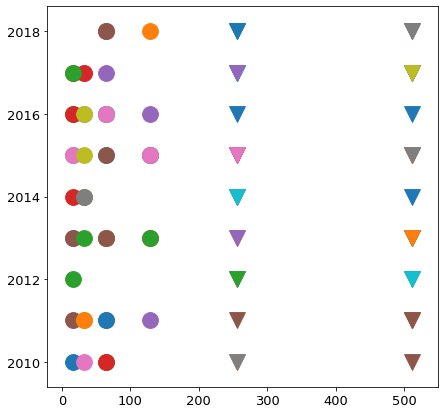

In [274]:
fig = plt.figure(figsize=(7, 7))

markers = {"Android": "o", "iOS": "v"}
for d1, d2, l in zip(phones.disk, phones.year, phones.os):
    plt.scatter(d1, d2, s=250, marker = markers[l])
plt.show()

In [275]:
from sklearn.cluster import KMeans

In [276]:
X = phones[["disk", "year"]]
clust = KMeans(n_clusters=2).fit(X)

In [277]:
[c1, c2] = clust.cluster_centers_

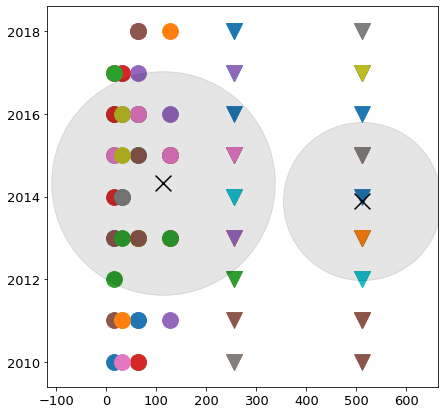

In [278]:
fig = plt.figure(figsize=(7, 7))

markers = {"Android": "o", "iOS": "v"}
for d1, d2, l in zip(phones.disk, phones.year, phones.os):
    plt.scatter(d1, d2, s=250, marker = markers[l])
    
plt.scatter(c1[0], c1[1], s=250, marker="x", c="black")
plt.scatter(c1[0], c1[1], s=250 * 1e2, c="black", alpha=0.1)

plt.scatter(c2[0], c2[1], s=250, marker="x", c="black")
plt.scatter(c2[0], c2[1], s=250 * 2e2, c="black", alpha=0.1)

plt.show()

In [279]:
phones['os'] = phones['os'].isin(['iOS']).astype('int')

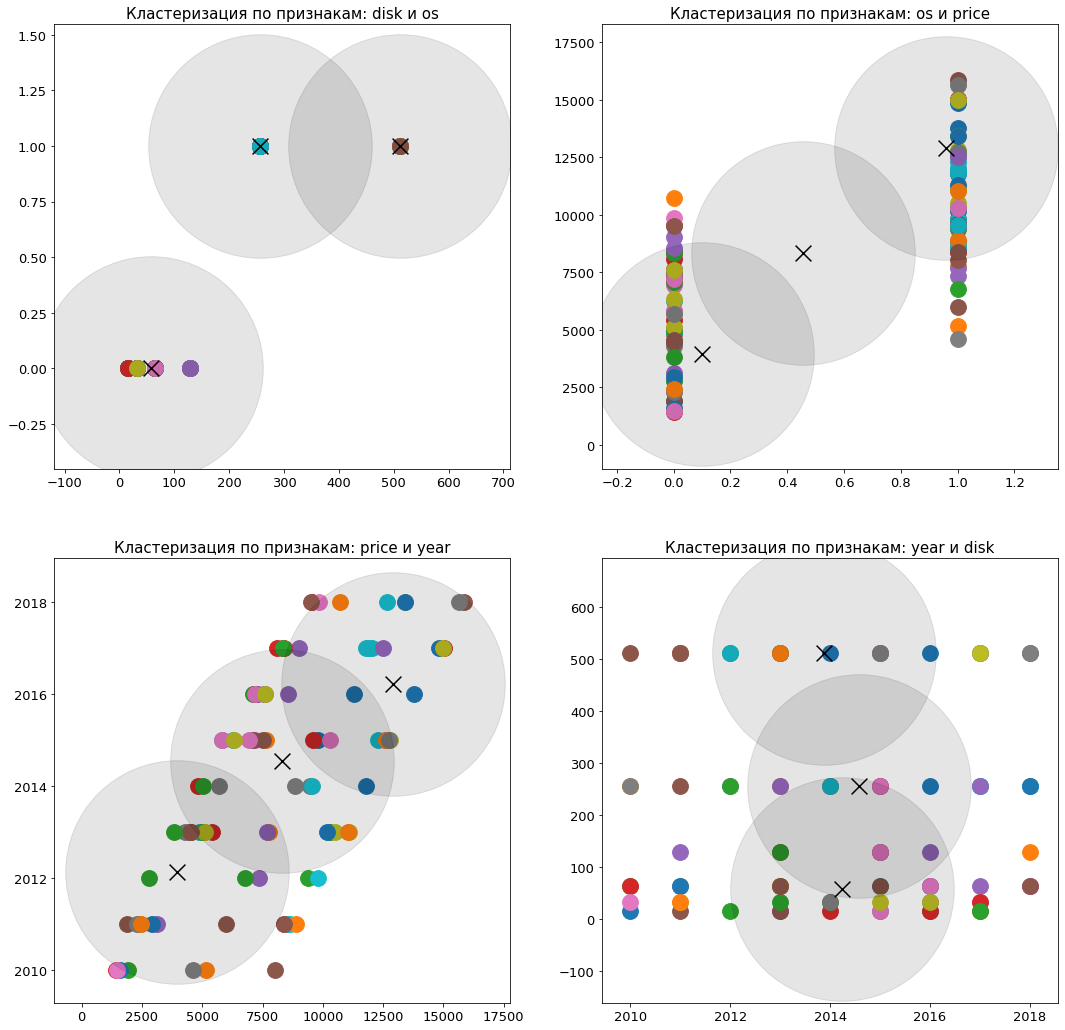

In [280]:
allcolumns = list(phones.columns)
figure = plt.figure(figsize=(18, 18))
i = 1
for column in allcolumns:
    nextcolumn = allcolumns[(allcolumns.index(column) + 1) % len(allcolumns)]
    ax = figure.add_subplot(2, 2, i)
    ax.set_title("Кластеризация по признакам: {} и {}".format(column, nextcolumn), fontsize = 15)
    
    for d1, d2 in zip(phones[column], phones[nextcolumn]):
        plt.scatter(d1, d2, s = 250)
    
    X = phones[[column, nextcolumn]]
    clust = KMeans(n_clusters = 3).fit(X)
    [c1, c2, c3] = clust.cluster_centers_
    
    plt.scatter(c1[0], c1[1], s=250, marker="x", c="black")
    plt.scatter(c1[0], c1[1], s=250 * 2e2, c="black", alpha=0.1)

    plt.scatter(c2[0], c2[1], s=250, marker="x", c="black")
    plt.scatter(c2[0], c2[1], s=250 * 2e2, c="black", alpha=0.1)
    
    plt.scatter(c3[0], c3[1], s=250, marker="x", c="black")
    plt.scatter(c3[0], c3[1], s=250 * 2e2, c="black", alpha=0.1)
    
    i += 1
plt.show()

In [281]:
def get_clusters(num, df):
    
    allcolumns = list(df.columns)
    
    figure = plt.figure(figsize=(18, 18))
    i = 1
    for column in allcolumns:
        nextcolumn = allcolumns[(allcolumns.index(column) + 1) % len(allcolumns)]
        ax = figure.add_subplot(2, 2, i)
        ax.set_title("Кластеризация по признакам: {} и {}".format(column, nextcolumn), fontsize = 15)
    
        for d1, d2 in zip(df[column], df[nextcolumn]):
            plt.scatter(d1, d2, s = 250)
    
            X = df[[column, nextcolumn]]
            cc = KMeans(n_clusters = num).fit(X).cluster_centers_
        
        j = 1
        while j <= num:                
            plt.scatter(cc[j - 1][0], cc[j - 1][1], s=250, marker="x", c="black")
            plt.scatter(cc[j - 1][0], cc[j - 1][1], s=250 * 2e2, c="grey", alpha=0.1)
            j += 1
        i += 1
    plt.show()

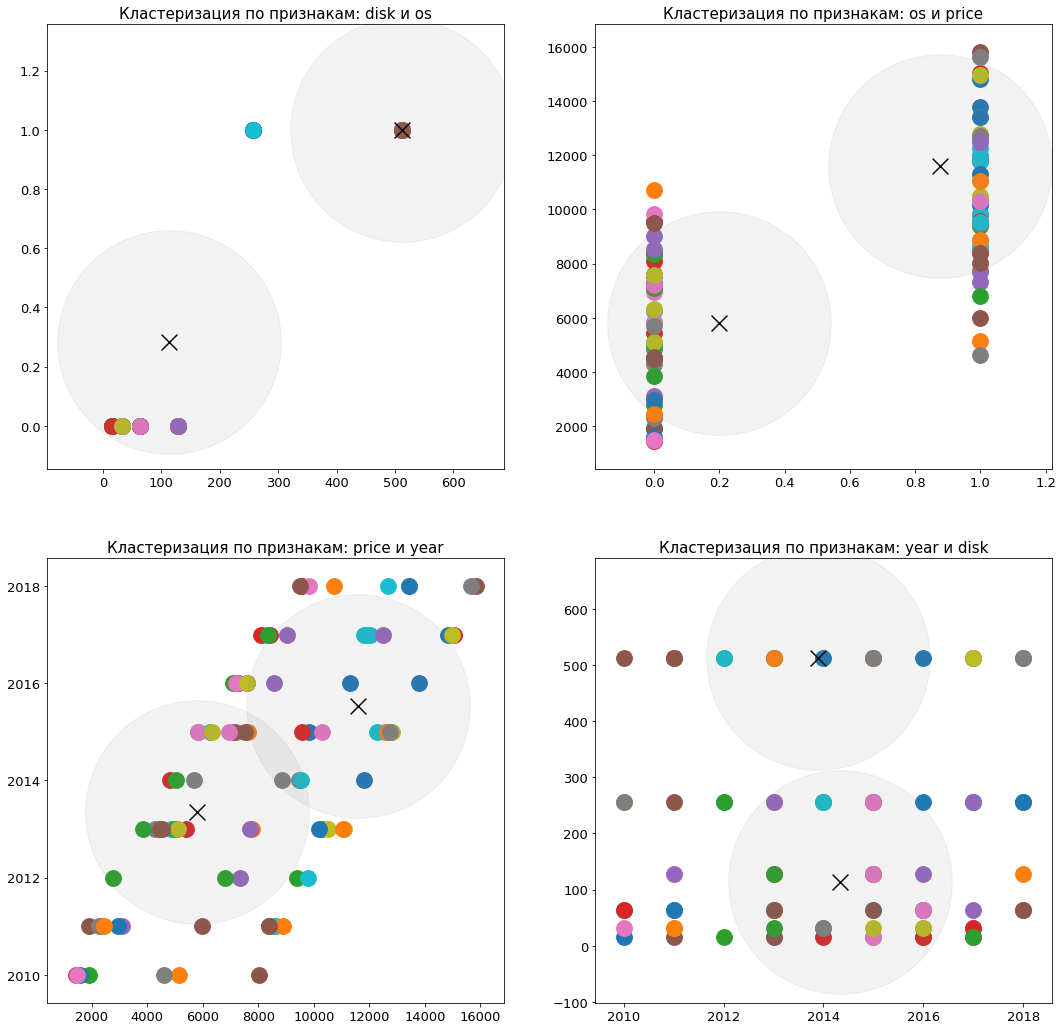

In [282]:
"""
Функция отображенимя кластеризации на графиках
Аргументами являются количество кластеров и исследуемый датафрейм
Также можно добавить в качестве аргументов параметры subplots и figsize и тд
"""
get_clusters(2, phones)

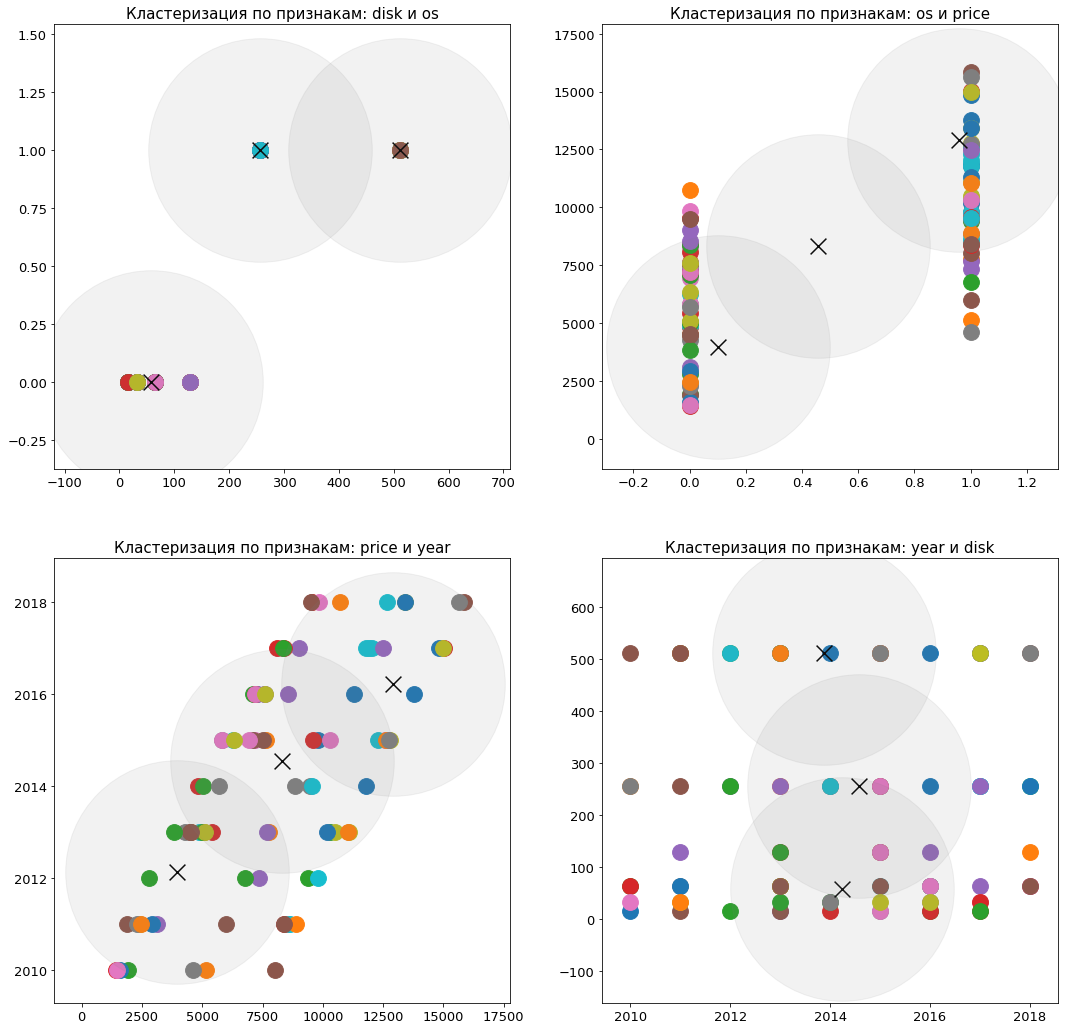

In [283]:
get_clusters(3, phones)